# bank case study(loan prediction)

ASSUMING THAT WE ARE WORKING FOR AN CONSUMER FINANCE COMPANY WHICH SPECIALISES IN VARIOUS TYPES OF LOANS WITH LOWER INTERST RATE THROUGH A FAST ONLINE INTERFACE LIKE:
     >PERSONAL LOANS
     >BUSINESS LOANS
     >MEDICAL LOANS


IF ANYBODY WANT A LOAN THEY HAVE TO APPLY FOR LOAN
    NOW, WHEN THE COMPANY RECEIVES A LOAN APPLICATION,WE HAVE TO MAKE A DECISION ON LOAN APPROVAL BASED ON
         >IF APPLICANT IS "LIKELY TO REPAY THE LOAN"
         >IF APPLICANT IS "NOT LIKELY TO REPAY THE LOAN"(DEFAULTERS)


IF WE FIND DEFAULTERS, WHICH HELPS US TO ACTIONS LIKE "DENYING THE LOAN","GIVING LESS AMOUNT FOR LOAN","GIVING LOAN AT HIGHER INTERST RATE"


TYPES OF LOANS:
[1]LOAN ACCEPTED
      >FULLY PAID
      >CURRENTLY PAYING
      >CHARGED OFF(ALSO CALLED DEFAULTERS)
[2]LOAN REJECTED


WHAT IS FINANCIAL LOSS?
loss of money resulting from failure of a debt to be paid because of defaulters


# importing libraries & reading CSV file

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
bank=pd.read_csv('E:\loan.csv')
print(bank.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [3]:
bank.shape

(39717, 111)

In [4]:
bank.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
bank.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# finding missing values/data

first of all we have to findout the missing data or values and to segment them from the file in order to analyse data easily

>>>bank.isnull() or bank.notnull helps us to find the columns contain missing values and it can be deleted for another analysis.


In [6]:
bank.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [7]:
bank.notnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
2,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
4,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39713,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39714,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
39715,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [8]:
bank.isnull().sum(axis=0)

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

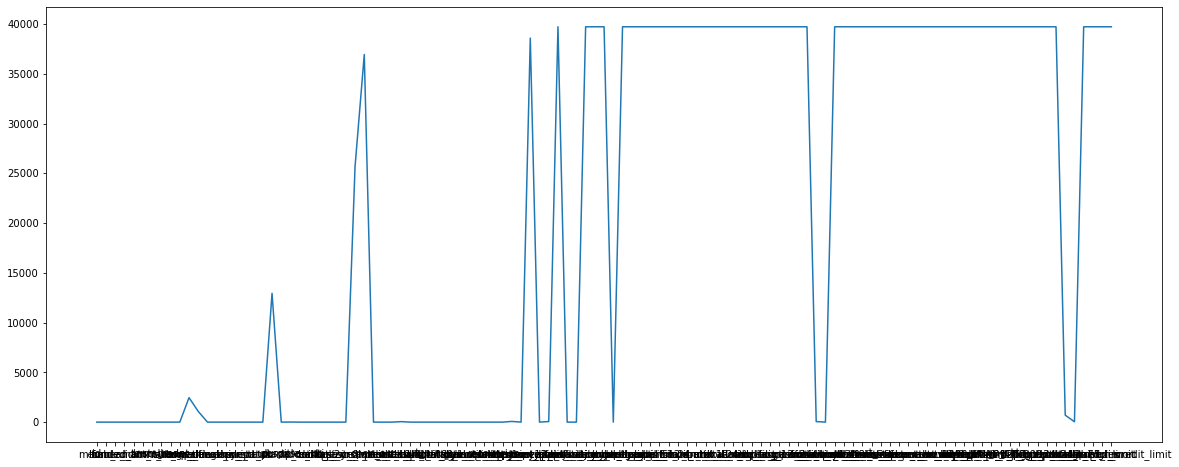

In [11]:
plt.figure(figsize=(20,8))
plt.plot(bank.isnull().sum(axis=0))

In [10]:
bank.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

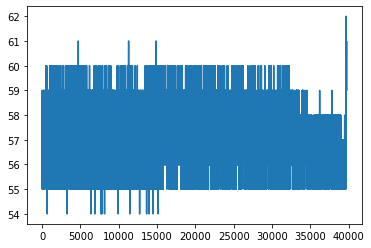

In [34]:
plt.plot(bank.isnull().sum(axis=1))

In [35]:
bank.notnull().sum(axis=0)

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

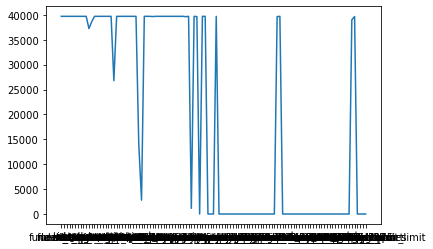

In [36]:
plt.plot(bank.notnull().sum(axis=0))

In [37]:
bank.notnull().sum(axis=1)

0        53
1        54
2        52
3        55
4        56
         ..
39712    52
39713    52
39714    50
39715    50
39716    52
Length: 39717, dtype: int64

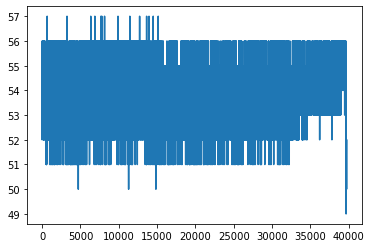

In [38]:
ab=bank.notnull().sum(axis=1)
plt.plot(ab)

>>> And we observe the distribution of missing data through the rows and columns among the given data like above.

# printing columns

In [65]:
bank.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [67]:
print(pd.options.display.max_columns==None)
print(pd.options.display.max_rows==None)
print(bank.columns)
bank.columns.shape

False
False
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')


(53,)

In [41]:
column_with_nan=bank.columns[bank.isnull().any()]
bank.shape
for column in column_with_nan:
    print(column,bank[column].isnull().sum())
print(bank.shape)

emp_title 2459
emp_length 1075
desc 12940
title 11
mths_since_last_delinq 25682
mths_since_last_record 36931
revol_util 50
last_pymnt_d 71
next_pymnt_d 38577
last_credit_pull_d 2
collections_12_mths_ex_med 56
mths_since_last_major_derog 39717
annual_inc_joint 39717
dti_joint 39717
verification_status_joint 39717
tot_coll_amt 39717
tot_cur_bal 39717
open_acc_6m 39717
open_il_6m 39717
open_il_12m 39717
open_il_24m 39717
mths_since_rcnt_il 39717
total_bal_il 39717
il_util 39717
open_rv_12m 39717
open_rv_24m 39717
max_bal_bc 39717
all_util 39717
total_rev_hi_lim 39717
inq_fi 39717
total_cu_tl 39717
inq_last_12m 39717
acc_open_past_24mths 39717
avg_cur_bal 39717
bc_open_to_buy 39717
bc_util 39717
chargeoff_within_12_mths 56
mo_sin_old_il_acct 39717
mo_sin_old_rev_tl_op 39717
mo_sin_rcnt_rev_tl_op 39717
mo_sin_rcnt_tl 39717
mort_acc 39717
mths_since_recent_bc 39717
mths_since_recent_bc_dlq 39717
mths_since_recent_inq 39717
mths_since_recent_revol_delinq 39717
num_accts_ever_120_pd 39717
num_

In [42]:
for column in column_with_nan:
    if bank[column].isnull().sum()*100.0/bank.shape[0]>50:
        bank.drop(column,1,inplace=True)
bank.shape

(39717, 54)

>>> the above two cells displays the columns  with mising values
>>>> we have total 111 columns and among them 54 columns conists of missing valus more than 50% thats why we deleteing those columns 
>>> after deleting the 54 columns we consists of 57 columns.

In [12]:
111-57

54

In [44]:
col=list(bank.columns)[53:111]
bank.drop(col,axis=1,inplace=True)
bank.shape

(39717, 53)

In [45]:
bank

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN


In [46]:
column_with_nann=bank.columns[bank.isnull().any()]
bank.shape
for column in column_with_nann:
    print(column,bank[column].isnull().sum())
print(bank.shape)

emp_title 2459
emp_length 1075
desc 12940
title 11
revol_util 50
last_pymnt_d 71
last_credit_pull_d 2
collections_12_mths_ex_med 56
chargeoff_within_12_mths 56
pub_rec_bankruptcies 697
(39717, 53)


In [47]:
bank.shape

(39717, 53)

In [48]:
bank.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

>>> the above cell shows the remaning columns after deleting missing data columns

# performing pandas operations

loan amount=The listed amount of the loan applied for by the borrower.
            If at some point in time, the credit department reduces the loan amount,
            then it will be reflected in this value.

In [ ]:
>>> the below plot shows the distribution of data of loan amount,funded amount,funded amount inv 

In [49]:
bank['loan_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: loan_amnt, Length: 39717, dtype: int64

35000
500


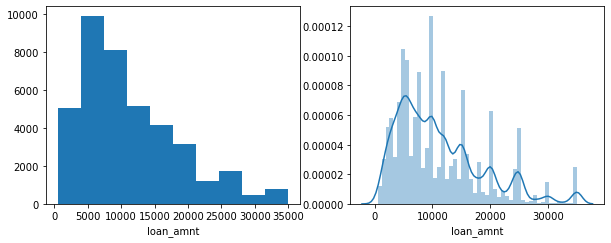

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(bank['loan_amnt'])
plt.xlabel('loan_amnt')

plt.subplot(222)
sns.distplot(bank['loan_amnt'])
plt.xlabel('loan_amnt')
print(max(bank['loan_amnt']))
print(min(bank['loan_amnt']))

funded_amnt=The total amount committed to that loan at that point in time.

In [51]:
bank['funded_amnt']

0         5000
1         2500
2         2400
3        10000
4         3000
         ...  
39712     2500
39713     8500
39714     5000
39715     5000
39716     7500
Name: funded_amnt, Length: 39717, dtype: int64

10000    2741
12000    2244
5000     2040
6000     1898
15000    1784
         ... 
25675       1
1475        1
30400       1
24275       1
28750       1
Name: funded_amnt, Length: 1041, dtype: int64
35000
500


10712

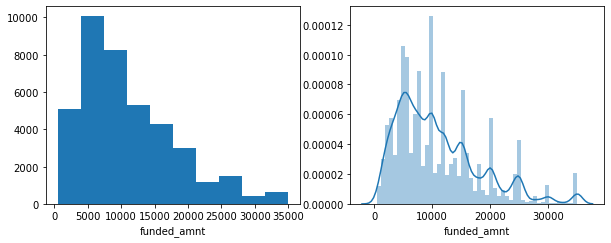

In [52]:
print(bank['funded_amnt'].value_counts())
plt.figure(figsize=(10,8))
plt.subplot(221)
plt.hist(bank['funded_amnt'])
plt.xlabel('funded_amnt')

plt.subplot(222)
sns.distplot(bank['funded_amnt'])
plt.xlabel('funded_amnt')


print(max(bank['funded_amnt']))
print(min(bank['funded_amnt']))

a=2741+2244+2040+1898+1784+5
a

500

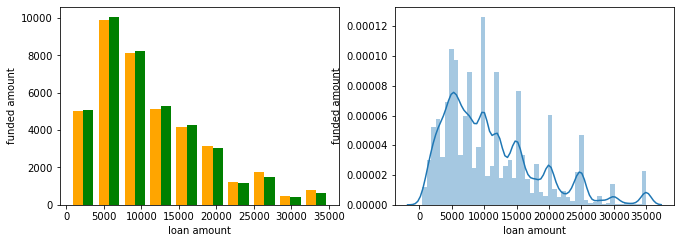

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(11,8))
x=bank['loan_amnt']
y=bank['funded_amnt']
plt.subplot(221)
plt.hist([x,y],color=['orange','green'])
plt.xlabel('loan amount')
plt.ylabel('funded amount')

plt.subplot(222)
sns.distplot([x,y])
plt.xlabel('loan amount')
plt.ylabel('funded amount')

max(bank['funded_amnt'])
min(bank['funded_amnt'])

In [ ]:
>>> the above cell shows the loan amount and funded amount,which shows approximately equally distributed 
which shows that there is no proper loss by observing these two parameters.  

funded_amnt_inv=The total amount committed by investors for that loan at that point in time.

35000.0
0.0


Text(0.5, 0, 'funded amount')

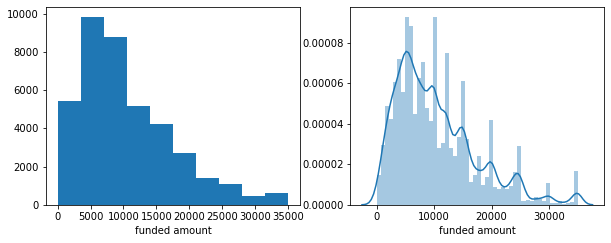

In [54]:
print(max(bank['funded_amnt_inv']))
print(min(bank['funded_amnt_inv']))

plt.figure(figsize=(10,8))
plt.subplot(221)
bank['funded_amnt_inv']
plt.hist(bank['funded_amnt_inv'])
plt.xlabel('funded amount')

plt.subplot(222)
bank['funded_amnt_inv']
sns.distplot(bank['funded_amnt_inv'])
plt.xlabel('funded amount')

installment=The monthly payment owed by the borrower if the loan originates.

1305.19
15.69


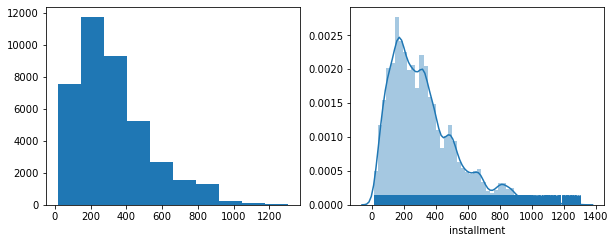

In [56]:
print(max(bank['installment']))
print(min(bank['installment']))
plt.figure(figsize=(10,8))

plt.subplot(221)
bank['installment']
plt.hist(bank['installment'])

plt.subplot(222)
bank['installment']
sns.distplot(bank['installment'],rug=True)

>>> The above installment shows that,there are maximum installers at the range of 200 to 400

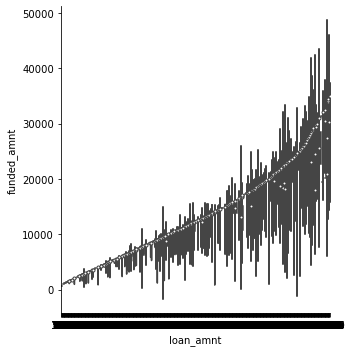

In [57]:
sns.catplot(x='loan_amnt',y='funded_amnt',kind='violin',data=bank)

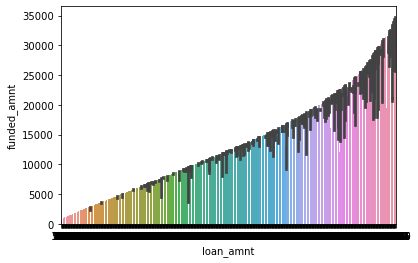

In [58]:
sns.barplot(x='loan_amnt',y='funded_amnt',data=bank)
plt.show()

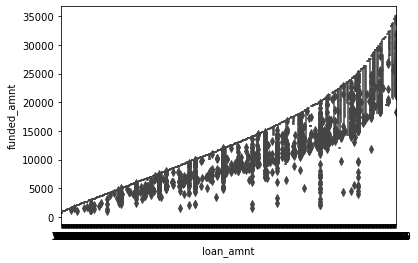

In [59]:
sns.boxplot(x='loan_amnt',y='funded_amnt', data=bank)
plt.show()

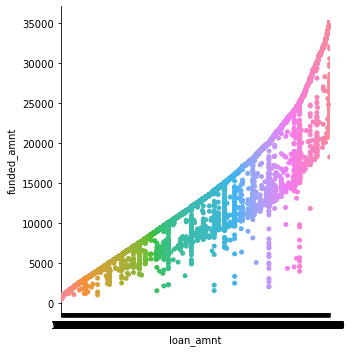

In [61]:
sns.catplot(x='loan_amnt',y='funded_amnt',data=bank)

>>> the above figure shows the bivariate analysis between loan amount and funded amount which shows the linearly increses.

In [62]:
print(bank['term'].value_counts())
39716-29096

 36 months    29096
 60 months    10621
Name: term, dtype: int64


10620

>>>The term of the loan takes only consists of 36 months and 60 months duration, for returning back of loan taken amount
>>> by observing above,we see that there are maximum members taken on 36 months duration.

(array([29096.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10621.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

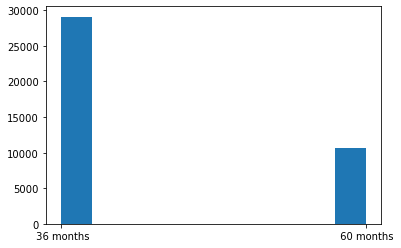

In [63]:
plt.hist(bank['term'])

>>> the below cells shows the different grades of members.

In [50]:
bank[bank['grade']=='A']
bank[bank['grade']=='A'].shape

(10085, 51)

In [51]:
bank[bank['grade']=='B']
bank[bank['grade']=='B'].shape

(12020, 51)

In [52]:
bank[bank['grade']=='C']
bank[bank['grade']=='C'].shape

(8098, 51)

In [53]:
bank[bank['grade']=='D']
bank[bank['grade']=='D'].shape

(5307, 51)

In [54]:
bank[bank['grade']=='E']
bank[bank['grade']=='E'].shape

(2842, 51)

In [55]:
bank[bank['grade']=='F']
bank[bank['grade']=='F'].shape

(1049, 51)

In [56]:
bank[bank['grade']=='G']
bank[bank['grade']=='G'].shape

(316, 51)

we have to make decision on approving loan of 'E','F','G' grades because those are comes under "defaulters". 
if we make proper decision on this we dont get financial loss on bank.

In [ ]:
>>> the pie chart shows the % of distribution of various grades.
>>> And also the below pie chart shows the percentage of subgrades "A1","A2","A3","A4","A5", which helps us for easy anaysis.

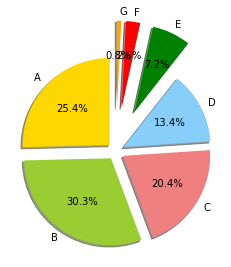

In [57]:
grades=[10085,12020,8098,5307,2842,1049,316]
labels = 'A','B','C','D','E','F','G'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','red','orange']
explode = (0.1,0.1,0.1,0.1,0.5,0.5,0.5) 
plt.pie(grades, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [58]:
print(bank[bank['sub_grade']=='A1'].shape)
print(bank[bank['sub_grade']=='A2'].shape)
print(bank[bank['sub_grade']=='A3'].shape)
print(bank[bank['sub_grade']=='A4'].shape)
print(bank[bank['sub_grade']=='A5'].shape)

bank[bank['grade']=='A'].shape

(1139, 51)
(1508, 51)
(1810, 51)
(2886, 51)
(2742, 51)


(10085, 51)

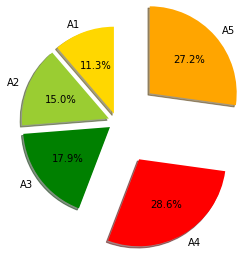

In [59]:
subgrades_a=[1139,1508,1810,2886,2742]
labels = 'A1','A2','A3','A4','A5'
colors = ['gold', 'yellowgreen','green','red','orange']
explode = (0.1,0.1,0.1,0.5,0.5) 
plt.pie(subgrades_a, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [60]:
print(bank[bank['sub_grade']=='B1'].shape)
print(bank[bank['sub_grade']=='B2'].shape)
print(bank[bank['sub_grade']=='B3'].shape)
print(bank[bank['sub_grade']=='B4'].shape)
print(bank[bank['sub_grade']=='B5'].shape)

bank[bank['grade']=='B'].shape

(1830, 51)
(2057, 51)
(2917, 51)
(2512, 51)
(2704, 51)


(12020, 51)

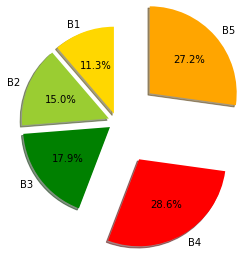

In [61]:
subgrades_b=[1139,1508,1810,2886,2742]
labels = 'B1','B2','B3','B4','B5'
colors = ['gold', 'yellowgreen','green','red','orange']
explode = (0.1,0.1,0.1,0.5,0.5) 
plt.pie(subgrades_b, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [62]:
print(bank[bank['sub_grade']=='C1'].shape)
print(bank[bank['sub_grade']=='C2'].shape)
print(bank[bank['sub_grade']=='C3'].shape)
print(bank[bank['sub_grade']=='C4'].shape)
print(bank[bank['sub_grade']=='C5'].shape)

bank[bank['grade']=='C'].shape

(2136, 51)
(2011, 51)
(1529, 51)
(1236, 51)
(1186, 51)


(8098, 51)

In [63]:
print(bank[bank['sub_grade']=='D1'].shape)
print(bank[bank['sub_grade']=='D2'].shape)
print(bank[bank['sub_grade']=='D3'].shape)
print(bank[bank['sub_grade']=='D4'].shape)
print(bank[bank['sub_grade']=='D5'].shape)

bank[bank['grade']=='D'].shape

(931, 51)
(1348, 51)
(1173, 51)
(981, 51)
(874, 51)


(5307, 51)

In [64]:
print(bank[bank['sub_grade']=='E1'].shape)
print(bank[bank['sub_grade']=='E2'].shape)
print(bank[bank['sub_grade']=='E3'].shape)
print(bank[bank['sub_grade']=='E4'].shape)
print(bank[bank['sub_grade']=='E5'].shape)

bank[bank['grade']=='E'].shape

(763, 51)
(656, 51)
(553, 51)
(454, 51)
(416, 51)


(2842, 51)

In [65]:
print(bank[bank['sub_grade']=='F1'].shape)
print(bank[bank['sub_grade']=='F2'].shape)
print(bank[bank['sub_grade']=='F3'].shape)
print(bank[bank['sub_grade']=='F4'].shape)
print(bank[bank['sub_grade']=='F5'].shape)

bank[bank['grade']=='F'].shape

(329, 51)
(249, 51)
(185, 51)
(168, 51)
(118, 51)


(1049, 51)

In [66]:
print(bank[bank['sub_grade']=='G1'].shape)
print(bank[bank['sub_grade']=='G2'].shape)
print(bank[bank['sub_grade']=='G3'].shape)
print(bank[bank['sub_grade']=='G4'].shape)
print(bank[bank['sub_grade']=='G5'].shape)

bank[bank['grade']=='G'].shape

(104, 51)
(78, 51)
(48, 51)
(56, 51)
(30, 51)


(316, 51)

>>>emp_length=Employment length in years. 
    Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [67]:
print(bank[bank['emp_length']=='1 year'].shape)
print(bank[bank['emp_length']=='2 years'].shape)
print(bank[bank['emp_length']=='3 years'].shape)
print(bank[bank['emp_length']=='4 years'].shape)
print(bank[bank['emp_length']=='5 years'].shape)
print(bank[bank['emp_length']=='6 years'].shape)
print(bank[bank['emp_length']=='7 years'].shape)
print(bank[bank['emp_length']=='8 years'].shape)
print(bank[bank['emp_length']=='9 years'].shape)
print(bank[bank['emp_length']=='10+ years'].shape)
print(bank[bank['emp_length']=='< 1 year'].shape)
3240+4388+4095+3436+3282+2229+1773+1479+1258+8879+4583

(3240, 51)
(4388, 51)
(4095, 51)
(3436, 51)
(3282, 51)
(2229, 51)
(1773, 51)
(1479, 51)
(1258, 51)
(8879, 51)
(4583, 51)


38642

>>home_ownership = The home ownership status provided by the borrower during registration. 
                    Our values are: RENT, OWN, MORTGAGE, OTHER.

(18899, 51)
(3058, 51)
(17659, 51)


39616

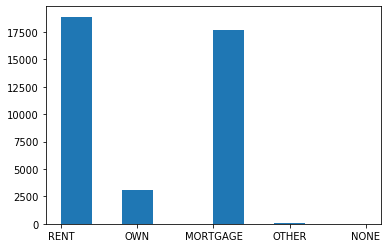

In [68]:
print(bank[bank['home_ownership']=='RENT'].shape)
print(bank[bank['home_ownership']=='OWN'].shape)
print(bank[bank['home_ownership']=='MORTGAGE'].shape)
#print(bank[bank['home_ownership']=='nan'].shape)
plt.hist(bank['home_ownership'])
18899+3058+17659

In [ ]:
>>>loan_status = Current status of the loan

In [39]:
bank.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

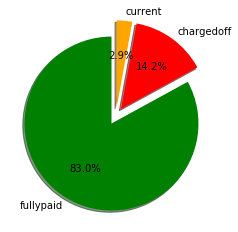

In [13]:
loanstatus=[32950,5627,1140]
labels = 'fullypaid','chargedoff','current'
colors = ['green','red','orange']
explode = (0.1,0.1,0.1) 
plt.pie(loanstatus, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

>>> there is no problem current paying
>>> we have make concentartion on charged off or defaulters

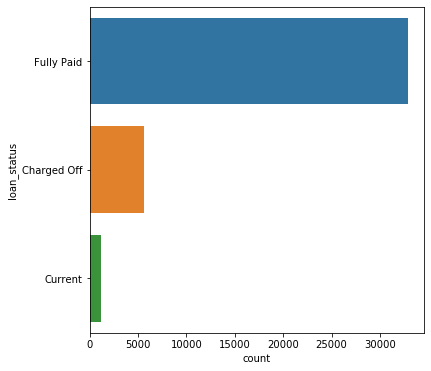

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(y="loan_status", data=bank)
plt.show()

pymnt_plan=Indicates if a payment plan has been put in place for the loan

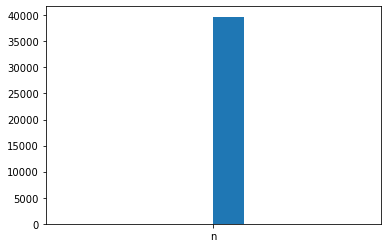

In [14]:
bank['pymnt_plan']
plt.hist(bank['pymnt_plan'])
plt.show()

purpose=A category provided by the borrower for the loan request. 
>>> the below figure shows the different purpose of intension of taking loan,like credit card,wedding,home loan ,carloan,business,medical,educational and so on.

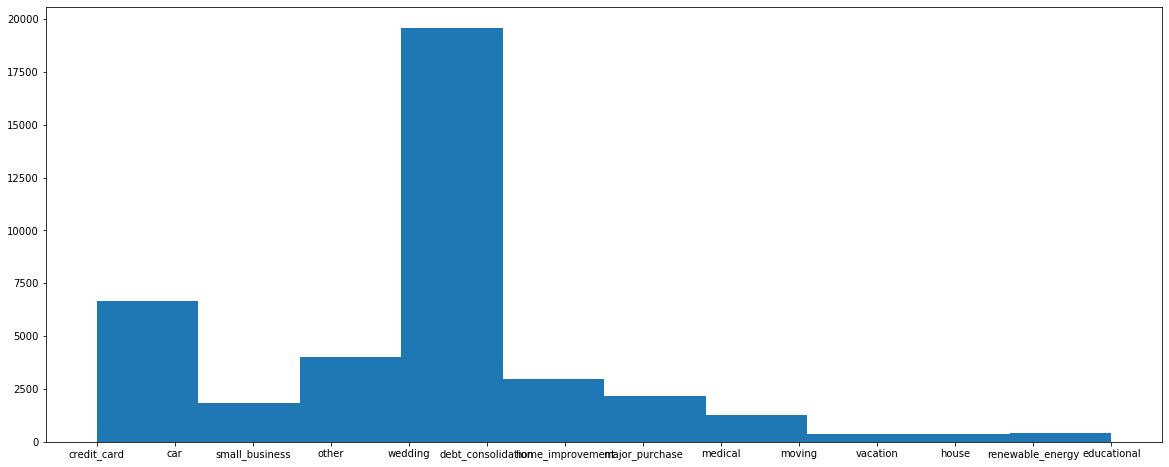

In [15]:
bank['purpose']
plt.figure(figsize=(20,8))
plt.hist(bank['purpose'])
plt.show()

dti=A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
excluding mortgage and the requested LC loan, divided by the borrower’s

29.99
0.0


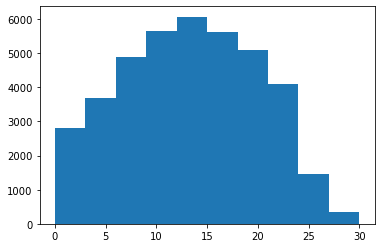

In [71]:
bank['dti'].describe()
plt.hist(bank['dti'])
print(max(bank['dti']))
print(min(bank['dti']))

delinq_2yrs=The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

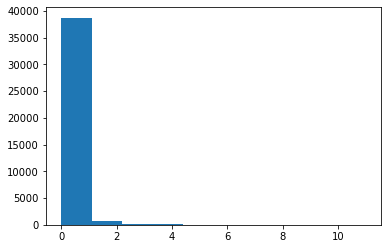

In [35]:
bank['delinq_2yrs']
plt.hist(bank['delinq_2yrs'])
plt.show()

>>>earliest_cr_line = The month the borrower's earliest reported credit line was opened

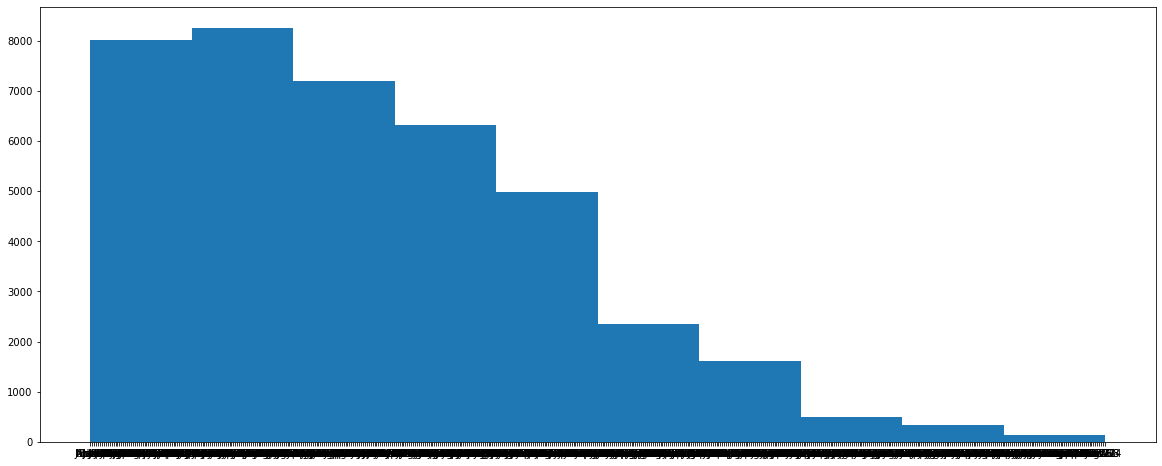

In [16]:
plt.figure(figsize=(20,8))
bank['earliest_cr_line']
plt.hist(bank['earliest_cr_line'])
plt.show()

>>>inq_last_6mths = The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

(array([1.9300e+04, 1.0971e+04, 5.8120e+03, 3.0480e+03, 0.0000e+00,
        3.2600e+02, 1.4600e+02, 6.4000e+01, 3.5000e+01, 1.5000e+01]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

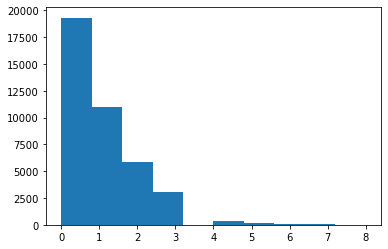

In [75]:
bank['inq_last_6mths']
plt.hist(bank['inq_last_6mths'])

>>>open_acc = The number of open credit lines in the borrower's credit file

44
2


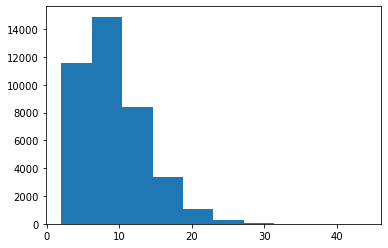

In [79]:
bank['open_acc']
plt.hist(bank['open_acc'])
print(max(bank['open_acc']))
print(min(bank['open_acc']))
#print(bank[bank['open_acc']].shape)

>>> pub_rec = Number of derogatory public records

(37601, 51)
(2116, 51)
39717


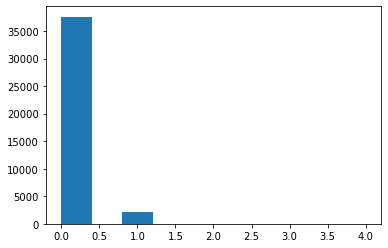

In [80]:
print(bank[bank['pub_rec']==0].shape)
print(bank[bank['pub_rec']!=0].shape)
plt.hist(bank['pub_rec'])
print(37601+2116)

>>> the below figure shows the joint plot of loan amount and funded amount whichs shows the lineraly distributed.

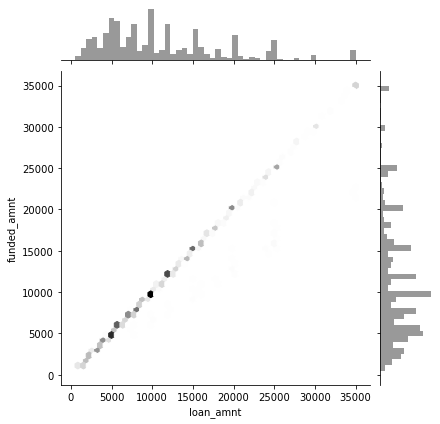

In [81]:
sns.jointplot('loan_amnt', 'funded_amnt', bank, kind="hex", color="k")

>>> revol_bal = Total credit revolving balance

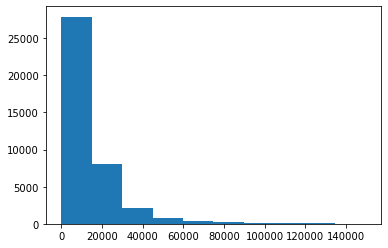

In [17]:
bank['revol_bal']
plt.hist(bank['revol_bal'])
plt.show()

>>> total_acc = The total number of credit lines currently in the borrower's credit file

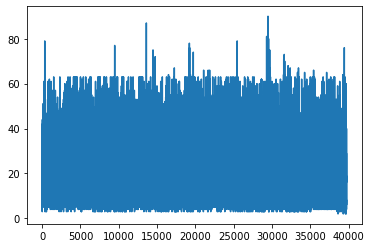

In [84]:
bank['total_acc']
plt.plot(bank['total_acc'])

>>> initial_list_status = The initial listing status of the loan. Possible values are – W, F

(39717, 111)


(array([    0.,     0.,     0.,     0.,     0., 39717.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

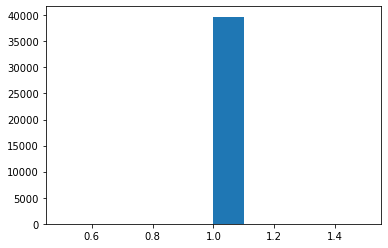

In [36]:
print(bank[bank['initial_list_status']=='f'].shape)
plt.hist([bank['initial_list_status']=='f'])

>>> out_prncp = Remaining outstanding principal for total amount funded

1140


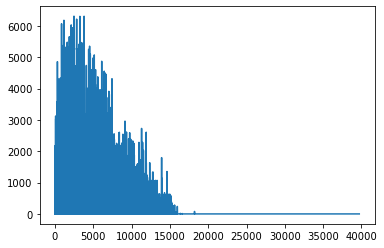

In [37]:
(bank[bank['out_prncp']==0]).shape
print(39717-38577)
plt.plot(bank['out_prncp'])
      

>>> out_prncp_inv = Remaining outstanding principal for portion of total amount funded by investors

1140


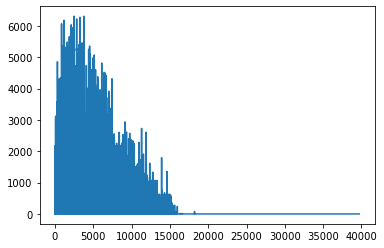

In [38]:
(bank[bank['out_prncp_inv']==0]).shape
print(39717-38577)
plt.plot(bank['out_prncp_inv'])

>>> total_pymnt = Payments received to date for total amount funded

(16, 51)
39701


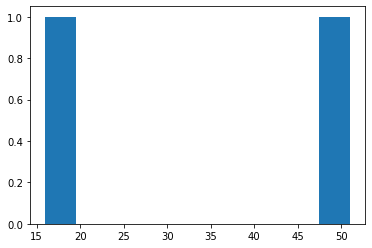

In [88]:
print((bank[bank['total_pymnt']==0]).shape)
plt.hist((bank[bank['total_pymnt']==0]).shape)
print(39717-16)

>>> total_pymnt_inv = Payments received to date for portion of total amount funded by investors


(165, 51)
39552


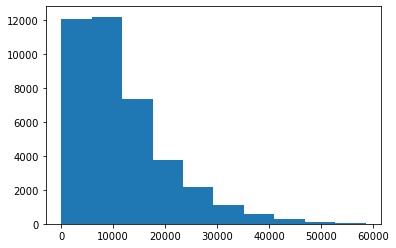

In [89]:
print((bank[bank['total_pymnt_inv']==0]).shape)
plt.hist(bank['total_pymnt_inv'])
print(39717-165)

>>> total_rec_prncp = Principal received to date

(74, 51)
39643


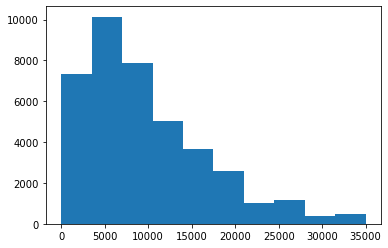

In [90]:
print((bank[bank['total_rec_prncp']==0]).shape)
plt.hist(bank['total_rec_prncp'])
print(39717-74)

>>> total_rec_int = Interest received to date

(71, 51)
39646


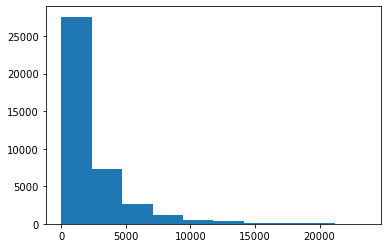

In [91]:
print((bank[bank['total_rec_int']==0]).shape)
plt.hist(bank['total_rec_int'])
print(39717-71)

>>> total_rec_late_fee = Late fees received to date

(37671, 51)
2046


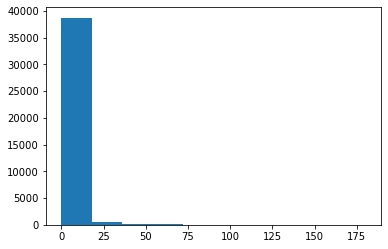

In [92]:
print((bank[bank['total_rec_late_fee']==0]).shape)
plt.hist(bank['total_rec_late_fee'])
print(39717-37671)

>>> 'recoveries = post charge off gross recovery

(35499, 51)
4218


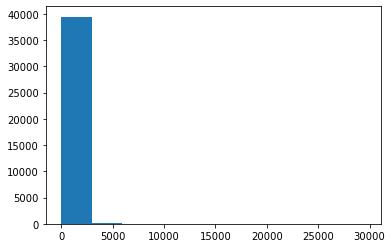

In [93]:
print((bank[bank['recoveries']==0]).shape)
plt.hist(bank['recoveries'])
print(39717-35499)

>>> collection_recovery_fee = post charge off collection fee

(35935, 51)
3782


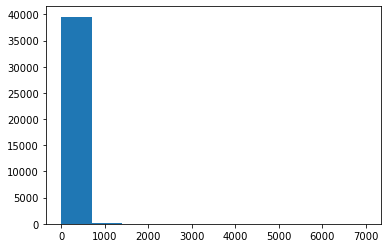

In [94]:
print((bank[bank['collection_recovery_fee']==0]).shape)
plt.hist(bank['collection_recovery_fee'])
print(39717-35935)

>>> last_pymnt_amnt = Last total payment amount received

(74, 51)
39643


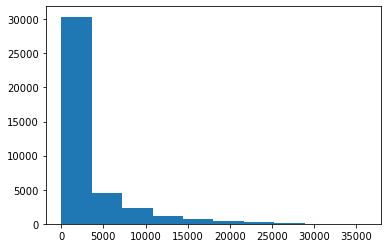

In [95]:
print((bank[bank['last_pymnt_amnt']==0]).shape)
plt.hist(bank['last_pymnt_amnt'])
print(39717-74)

(39661, 51)
56


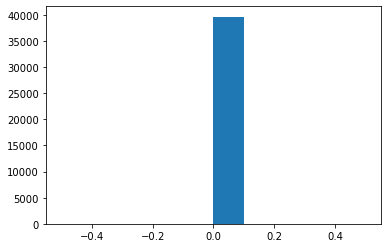

In [96]:
print((bank[bank['collections_12_mths_ex_med']==0]).shape)
plt.hist(bank['collections_12_mths_ex_med'])
print(39717-39661)

(array([    0.,     0.,     0.,     0.,     0., 39717.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

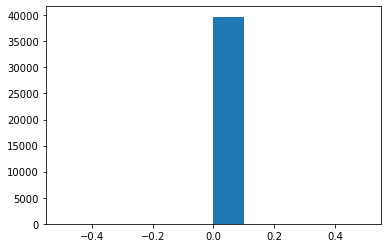

In [97]:
plt.hist(bank['collections_12_mths_ex_med']=='NA')

(39717, 51)


(array([    0.,     0.,     0.,     0.,     0., 39717.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

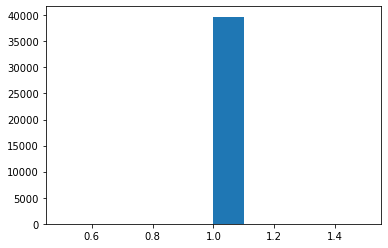

In [98]:
print((bank[bank['policy_code']==1]).shape)
plt.hist(bank['policy_code'])

(39717, 51)


(array([    0.,     0.,     0.,     0.,     0., 39717.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

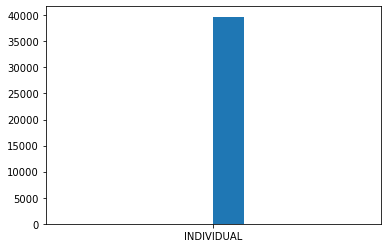

In [99]:
print((bank[bank['application_type']=='INDIVIDUAL']).shape)
plt.hist(bank['application_type'])

[10308, 2547, 1123, 843, 736, 657, 647, 577, 564, 562, 555, 546, 535, 531, 529, 529, 522, 516, 512, 502, 497, 494, 473, 473, 466, 448, 440, 425, 423, 422, 422, 416, 404, 396, 391, 390, 388, 377, 375, 374, 371, 370, 370, 368, 358, 338, 332, 324, 308, 308, 297, 258, 257, 254, 245, 201, 193, 165, 157, 156, 151, 148, 135, 129, 111, 107, 97, 93, 89, 69, 60, 51, 50, 48, 46, 46, 34, 33, 28, 27, 19, 16, 15, 15, 14, 13, 13, 12, 11, 10, 10, 9, 9, 5, 5, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1]


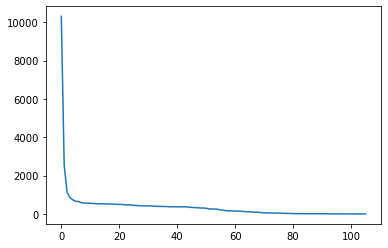

In [40]:
print(list(bank.last_credit_pull_d.value_counts()))
plt.plot(list(bank.last_credit_pull_d.value_counts()))

In [41]:
bank.application_type.value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

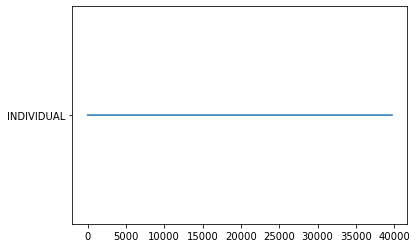

In [43]:
plt.plot(bank['application_type'])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
bank=pd.read_csv('E:\loan.csv')
print(bank.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

>>> the below shows the different plots of loan amount and funded amount.

In [16]:
pooji = pd.pivot_table(bank, values='loan_amnt', columns='funded_amnt')
pooji.head(5)

funded_amnt,500,700,725,750,800,900,950,1000,1050,1075,...,33500,33600,33950,34000,34250,34475,34525,34675,34800,35000
loan_amnt,500.0,700.0,725.0,750.0,800.0,900.0,950.0,1009.933775,1240.0,1075.0,...,33500.0,33600.0,33950.0,34000.0,35000.0,34475.0,34525.0,34837.5,34800.0,35000.0


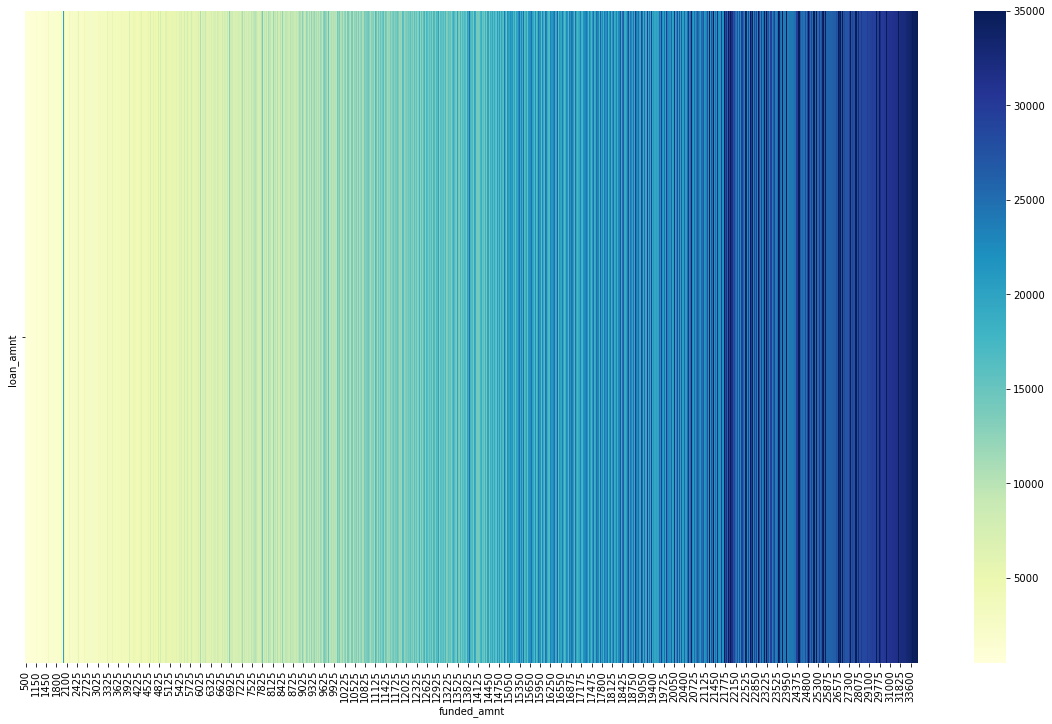

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(pooji, cmap="YlGnBu")
plt.show()

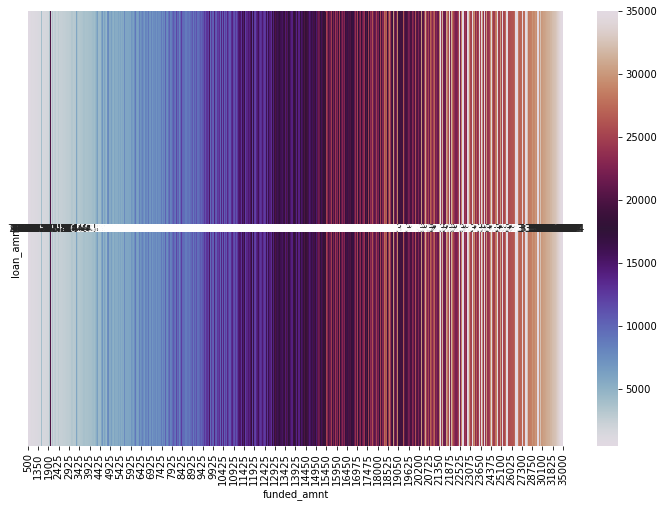

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(pooji, cmap="twilight",annot=True)

>>> the below figure shows the correlation of "loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc",and shows the different pairplots which were almost postive relation which shows the there is no much risk in running bank.

In [20]:
curr =bank[["loan_amnt", "funded_amnt", "funded_amnt_inv", "installment", "annual_inc"]]
curr.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc
0,5000,5000,4975.0,162.87,24000.0
1,2500,2500,2500.0,59.83,30000.0
2,2400,2400,2400.0,84.33,12252.0
3,10000,10000,10000.0,339.31,49200.0
4,3000,3000,3000.0,67.79,80000.0


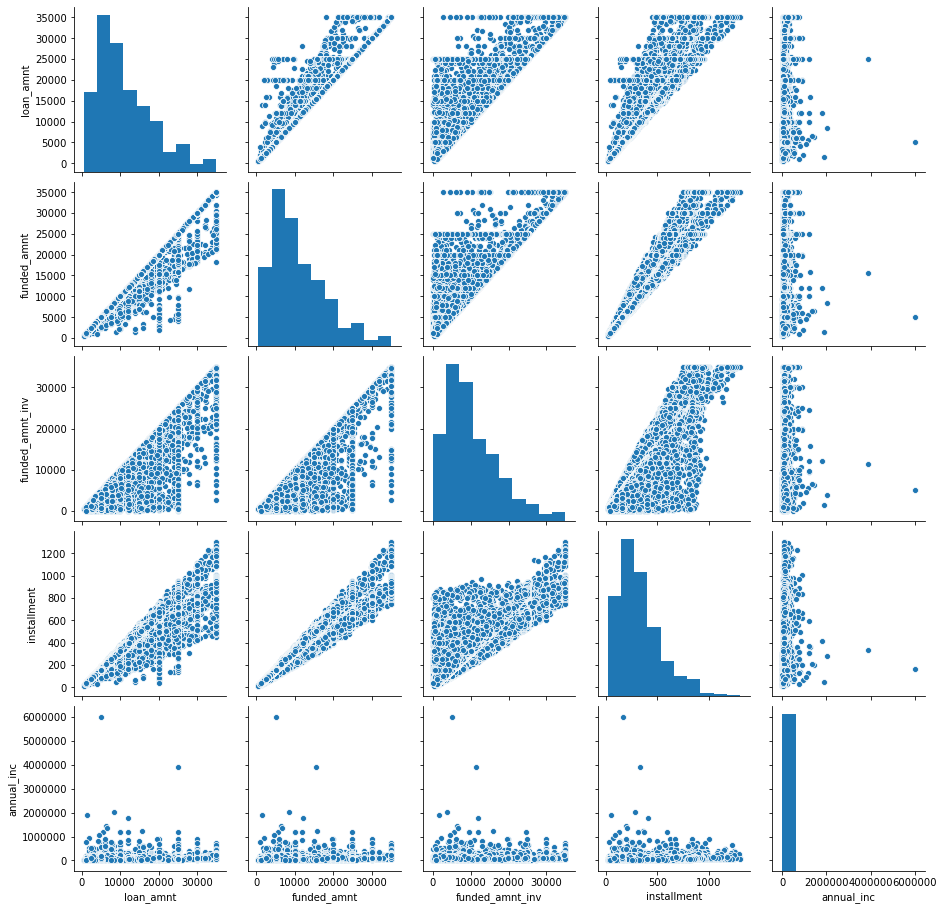

In [21]:
sns.pairplot(curr)
plt.show()

In [22]:
cor=curr.corr()
round(cor,3)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc
loan_amnt,1.000,0.982,0.940,0.930,0.271
funded_amnt,0.982,1.000,0.958,0.956,0.267
funded_amnt_inv,0.940,0.958,1.000,0.905,0.254
installment,0.930,0.956,0.905,1.000,0.271
annual_inc,0.271,0.267,0.254,0.271,1.000


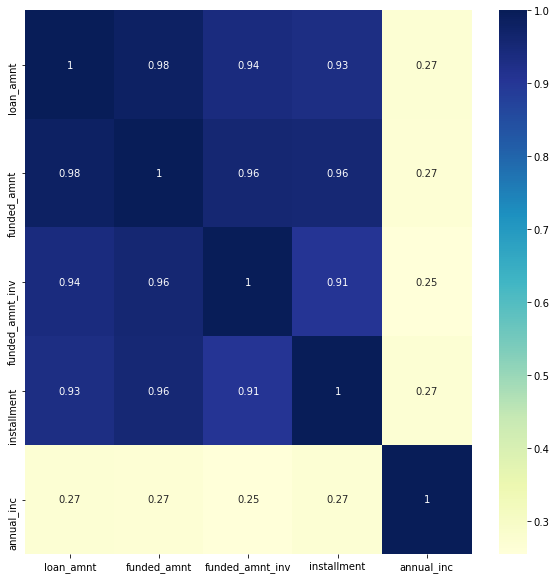

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

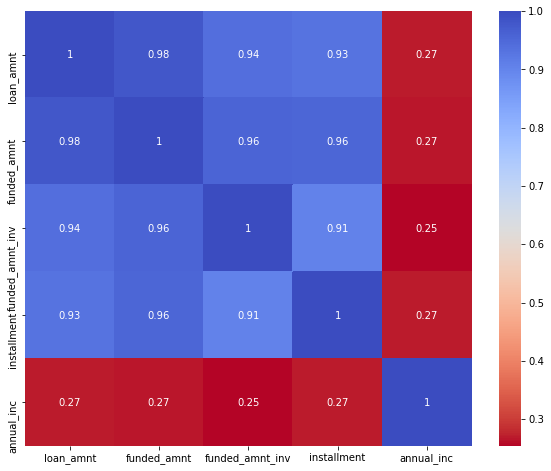

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(cor, cmap="coolwarm_r", annot=True)
plt.show()

# summary
>>>  by the above analysis there is proper relation between loan and funded amount which is no much risk.
>>>  by observing the grades we have only make proper decision on approving the loans of 'E','F','G'.
>>>  we also make concentration on approving the loans of 'RENT' & 'MORTAGE' ststus members.
>>>  we have to take proper actions on to charge bank amount back on defaulters(5627), which are "14.2%"
>>>  we also to proper concentration on purpose of loan application.
>>>  we also to take proper obsevations on remaining parameters to make bank financially profitable.